<a href="https://colab.research.google.com/github/WesRobbins/AdversarialML/blob/main/Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examination of Adversarial Machine Learning Exploratory Attacks and Defenses

The focus of this Colab Notebook is to examine defenses for exploratory attacks. We examine two attacks and then attempt to apply three defenses. Below is a breif explanation of the attacks and defenses we used. More details and experimentation for each section are linked in the appendix.<br/> 
# Attacks
We implement two attacks, *Fast Gradien Sign Method (FGSM)* and *Fast Gradient Sign Method with Random Step (RAND+FGSM)*. For each instance that we test an attack, we test the attack in two scenarios: *white box* and *black box*. White box is when the the adversary has access to internal information of the model. The black box model scenario is when the adversary does not have access to internal model information and therefor has to reverse engineer the model by querying[[5]](https://arxiv.org/pdf/1711.01768.pdf). <br/>To further examine black box attacks we test the strength of the attack with respect to how many queries the the adversary can make. <br/>
For our trials, we apply the attack image by image and then test the overall accuracy on the test set.
### FGSM Attack
Proposed in Goodfellow et al. 2014 [[3]](https://arxiv.org/pdf/1412.6572.pdf) <br/>
This attack works by sending the image through the neural network and using the prediction vector to compute loss. Using the loss we can find the gradient that gets sent back through the weights and "perturb" our image in the opposite direction by a very small amount. This results in a test set that visually appears unaltered but has significant affects on model performance.

### RAND + FGSM 
Proposed in Tramer et al. 2017 [[4]](https://arxiv.org/pdf/1705.07204.pdf) <br/>
This attack is the same as FGSM with the exception that it takes does a small random perturbation before doing the gradient based perturbation. The related paper suggests this a generally a stronger attack than vanilla FGSM.
<a name="d"></a>
#Defenses
The three possible approaches to an adversarial machine learning defense are:
1. Changing the data the model is trained on 
2. Changing the architecture of the model
3. Preprocessing the input before passing it to the model

We examine one defense from the first category (Adversarial Training) and two defenses from the third category (MagNet and DefenseGAN). An option for future work is to examine a defense from the second category.
### Adversarial Training
Adversarial training works by augmenting your training set with adversarial examples. This was first introduces as a defense in Gooodfellow et al. 2014 [[3]](https://arxiv.org/pdf/1412.6572.pdf). There have been many papers expanding on thr original defense including improvements in efficiency and robustness. Notably, Tramer et al 2017 [[4]](https://arxiv.org/pdf/1705.07204.pdf) shows broad improvements in adversarial training as a defense.
### MagNet
Meng and Chen 2017 [[2]](https://arxiv.org/pdf/1705.09064.pdf) <br>
MagNet is a proposed defensive framework that utilizes autoencoders to detect adversial inputs. They implement two styles of autoencoders, detectors and reformers. 

### DefenseGAN
The DefenseGAN defense was pruposed in Samangouei et al. 2018 [[1]](https://arxiv.org/pdf/1805.06605.pdf). This defense is similar to MagNet as it creates a representation of the training data and then projects all input onto this representation before the input is passed to the model. However, DefenseGAN creates the representation and then projects inputs to this reprsentation via different methods than MagNet. Specifically it uses a Generative Adversarial Network(GAN) to create the representation. The results provided in Samangouei et al. 2018 show this to be one of the strongest defenses to date against a variety of attacks. However, it is also very computaionally expensive.  











# Results Overview
## Attacks
In our trials we saw that the FGSM attack is able to significantly decrease the accuracy of a model. These results are consistent with what he saw in our previous [PoisonedData Notebook](https://colab.research.google.com/drive/1Wm8V6-3nKNzF8FdbYQ1pNAS2N-eVsHB1?authuser=1), however we expanded the test to 3 datasets. We also found that the standard FGSM attack was more effective than theRAND+FGSM attack.
### Blackbox Attacks
We found that a black box attack was only slightly less effective than its synonymous whitebox attack. With respect to query strength we found that the strength of a black box attack increases logarimically as the number of allowed queries increases.
## Defenses
We found that the implemented defenses were able to decrease the effectiveness of the attacks. However, shortcomings are still apparent in the defenses.


# Left Undone
There are several things that could be added to this notebook to make it more complete. In order to move on to a new AML topic in our independant study we have left them undone for the time being.
1. Explore a defense that uses the approach of changing the architecture(2nd category [above](#d))
2. Test Defenses on all 3 datasets
4. Add Carlini Wagner attack for thorough test of robustness. This [paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7958570) explains an attack that is stronger(although more computationally expensive) and fundamentally different than fgsm and its variants.

# Future Work
In chapter 8 Of the Adeversarial Machine Learning textbook the authors propose a way to evaluate how susceptibile a model is to an adversarial attack with few queries. 


<a name="appendix"></a>
# Appendix
- [Datasets](#data)
- [Code](#code1) 
- [Attack Examination](#attack)
  - [Baseline Whitebox vs Blackbox](#box)
  - [FGSM vs RAND+FGSM](#fgsm)
  - [Blackbox Query Strength](#qs)
- [Applying Defenses](#defense)
  - [Adversarial Training](#adv) 
  - [MagNet](#magnet)
  - [DefenseGAN](#dgan)

# References
1. P. Samangouei, M. Kabkab, R. Chellappa. 2018. *Defense-GAN: Protecting Classifiers Against Adversairal Attacks Using Generative Modls*. [https://arxiv.org/abs/1805.06605](https://arxiv.org/abs/1805.06605)
2. D. Meng, H. Chen. 2017. *MagNet: A Two Pronged Defense Against Adversarial Examples*. [https://arxiv.org/pdf/1705.09064.pdf](https://arxiv.org/pdf/1705.09064.pdf)
3. I. Goodfellow, J. Shlens, C. Szegedy. *Explaining and Harnessing Adversarial Examples*. 2014. [https://arxiv.org/pdf/1412.6572.pdf](https://arxiv.org/pdf/1412.6572.pdf)
4. F. Tramer, A. Kurakin, N. Papernot, I. Goodfellow, D. Boneh, P. McDaniel. 2017. *Ensemble Adversairal Training: Attacks and Defenses*. [https://arxiv.org/pdf/1705.07204.pdf](https://arxiv.org/pdf/1705.07204.pdf)
5. S. Joon Oh, M. Augustin, B Schiele, M. Fritz. 2018. *Towards Reverse Engineering Black-Box Nueral Networks*. [https://arxiv.org/pdf/1711.01768.pdf](https://arxiv.org/pdf/1711.01768.pdf)
6. M. Arjovsky, S. Chintala, L, Buttou. 2017. *Wasserstein GAN*. [https://arxiv.org/pdf/1701.07875.pdf](https://arxiv.org/pdf/1701.07875.pdf)

<a name="data"></a>
# Datasets
We use the all three of the below datasets in our trials against attacks. When applying the defenses we only used the fashion mnist dataset.
### Cifar10
- 10 classes of random things including dog, airplane,  and frog
- 60,000 training examples
- 10,000 testing examples
- 32 x 32 x 3 RGB images

### Fashion Mnist
- 10 classes associated with different clothing items
- 60,000 training examples
- 10,000 testing examples
- 28 x 28 grayscale images

### Mnist
- 10 classes for numbers 0-9
- 60,000 training examples
- 10,000 testing examples
- 28 x 28 grayscale images



<a name="code1"></a>
# Code
Below we have our code that these experiments are run on. This includes model construction, preprocessing our data, and implementation of attacks/defenses. Our models run on the keras/tensorflow API's.
<br/>[Return to Appendix](#appendix)

In [1]:
#Necessary imports for future code
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from datetime import datetime
import matplotlib.image as mpimg
import sys
import numpy as np
import random as rand
import os
import csv
import urllib
from importlib import reload
from termcolor import colored
import seaborn as sns
import pandas as pd
import copy
import glob
import imageio
import PIL
import time
from keras.constraints import Constraint
from IPython import display
from keras import backend
from google.colab import files
import itertools
import math

In [2]:
def load_run_save(arry, ds_name, v=0,multi_dim=False, **kwargs):
  if not multi_dim:
    saved.arrys[arry].clear()
    for eps in epsilon:
      print(f'{arry} - EPS: {eps}')
      saved.arrys[arry].append(load_and_run(ds_name, epsilon=eps, **kwargs))
      if (v == 2):
        print('++++++++++++++++++++++++')
        print(f'through dict: {saved.arrys[arry]}')
        print(f'direct: {saved.fashion_fgsm}')

    print(colored(f'{arry} array updated', 'green'))
  else:
    saved.arrys2d[arry].clear()
    for dim in multi_dim:
      print(f'Dimension is {dim}')
      row = []
      for eps in epsilon:
        print(f'{arry} - EPS: {eps}')
        row.append(load_and_run(ds_name, epsilon=eps, iters=dim, show=False, **kwargs))
      saved.arrys2d[arry].append(row)
      



def gan_normalize_img2(image, label):
  return (tf.cast(image, tf.float32) - 127.5)/127.5, label


def load_and_run(ds_name, black_box=False, attack=None, epsilon=None, defense=None, retrain=False, QS=None, show=True, iters=None):
  (ds_train, ds_test), ds_info = tfds.load(
    ds_name,
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
  )
  
  def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label


  #Preprocessing training data
  if defense == 'DefenseGAN':
    ds_train = ds_train.map(
        gan_normalize_img2, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  else:  
    ds_train = ds_train.map(
        normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  ds_train = ds_train.cache()
  ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
  ds_train = ds_train.batch(128)
  ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

  #Preprocessing testing data
  ds_test = ds_test.map(
      normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  ds_test = ds_test.batch(128)
  ds_test = ds_test.cache()
  ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

  #Constructs and trains the model
  model = construct_model()
  name = "model/trained"+ds_name

  if retrain==True:
    model.fit(ds_train, epochs=15)
    model.save_weights(name)
  else:
    if os.path.isfile(name+".index")==True:
      model.load_weights(name).expect_partial()
    else:
      print('Model Weights Not Found. Retraining Model.')
      model.fit(ds_train, epochs=15)
      model.save_weights(name)

  # Apply defensive technique
  AUTOTUNE = tf.data.experimental.AUTOTUNE
  adv_tr_epochs = 6
  if defense == 'adv-training' or defense == 'adv-trainingR':
    print('Making adversarinal training images...')
    if defense == 'adv-trainingR':
      fgsm_train = fgsm(ds_train, model, 'R')
      defense = 'adv-training'
    else:
      fgsm_train = fgsm(ds_train, model, epsilon)
    print('Training model on adversarial images(8 epochs)...')
    model2 = construct_model()
    adv_train = ds_train.concatenate(fgsm_train)
    adv_train = adv_train.shuffle(ds_info.splits['train'].num_examples)
    model2.fit(adv_train, epochs=8, verbose=0)
  elif defense == 'adv-training5':
    model2 = construct_model()
    fgsm_train = fgsm(ds_train, model, epsilon)
    adv_train = ds_train.concatenate(fgsm_train)
    adv_train = adv_train.shuffle(ds_info.splits['train'].num_examples)
    print(f'Training on Adversarial Imgs({adv_tr_epochs} epochs)... Iteration 1 of 5')
    model2.fit(adv_train, epochs=adv_tr_epochs, verbose=0)
    for i in range(4):
      fgsm_train = fgsm(ds_train, model2, epsilon)
      adv_train = ds_train.concatenate(fgsm_train)
      adv_train = adv_train.shuffle(ds_info.splits['train'].num_examples)
      print(f'Training on Adversarial Imgs({adv_tr_epochs} epochs)... Iteration {i+2} of 5')
      model2.fit(adv_train, epochs=adv_tr_epochs, verbose=0)
  elif defense == 'adv-training-iter':
    model2 = construct_model()
    fgsm_train = fgsm(ds_train, model, epsilon)
    adv_train = ds_train.concatenate(fgsm_train)
    adv_train.prefetch(AUTOTUNE)
    print(f'Training on Adversarial Imgs({adv_tr_epochs} epochs)... Iteration 1 of {iters}')
    model2.fit(adv_train, epochs=adv_tr_epochs, verbose=0)
    for i in range(iters-1):      
      fgsm_train = fgsm(ds_train, model2, epsilon)
      adv_train = ds_train.concatenate(fgsm_train)
      adv_train = adv_train.shuffle(ds_info.splits['train'].num_examples)
      print(f'Training on Adversarial Imgs({adv_tr_epochs} epochs)... Iteration {i+2} of {iters}')
      model2.fit(adv_train, epochs=adv_tr_epochs, verbose=0)
  elif defense == 'adv-trainingf-iter':
    model2 = construct_model()
    fgsm_train = fgsm(ds_train, model, epsilon)
    adv_train = ds_train.concatenate(fgsm_train)
    adv_train = adv_train.shuffle(ds_info.splits['train'].num_examples)
    adv_train = adv_train.cache()
    adv_train.prefetch(AUTOTUNE)
    print(f'Training on Adversarial Imgs({adv_tr_epochs} epochs)... Iteration 1 of {iters}')
    model2.fit(adv_train, epochs=adv_tr_epochs, verbose=0)
    for i in range(iters-1):
      print('start')
      ds_train = ds_train.shuffle(400)
      adv_train = ds_train.take(40)   
      fgsm_train = fgsm(ds_train.take(40), model2, epsilon)
      adv_train = adv_train.concatenate(fgsm_train)
      adv_train = adv_train.shuffle(80)
      adv_train = adv_train.cache()
      adv_train.prefetch(AUTOTUNE)
      print(f'Training on Adversarial Imgs({1} epochs)... Iteration {i+2} of {iters}')
      model2.fit(adv_train, epochs=1, verbose=1)

  elif defense == 'DefenseGAN':
    print("Beginning defense-Gan reconstructiontion...")
    ds_test = defenseGAN_reconstruct(ds_train)
    print('Back from reconstruction')

  elif defense == "magnet":
    ds_test = magnet(ds_train, ds_test, model, epsilon)


      
      


    
  # Creates black box 
  if black_box:
    if attack == 'fgsm2':
      box_model2 = create_black_box(adv_train, model2, QS)
    else:
      box_model = create_black_box(ds_train, model, QS)

  #Perturbs the testing data via fgsm method
  if attack == "fgsm":
    if not black_box:
      ds_test = fgsm(ds_test, model, epsilon)
    elif black_box:
      ds_test = fgsm(ds_test, box_model, epsilon)
  elif attack == 'fgsm2':
    if not black_box:
      ds_test = fgsm(ds_test, model2, epsilon)
    elif black_box:
      ds_test = fgsm(ds_test, box_model2, epsilon)
  elif attack == 'rand+fgsm':
    if not black_box:
      ds_test = rand_fgsm(ds_test, model, epsilon)
    elif black_box:
      ds_test = rand_fgsm(ds_test, box_model, epsilon)
    
  #Displays first 5 images of testing data
  if show:
    show_images(ds_test)
  
  print()
  print("Evaluation: ")

  if defense == None:
    results = model.evaluate(ds_test, verbose=2)[1]
  elif defense[:12] == 'adv-training':
    print('With adversarial training:', end=' ')
    results = model2.evaluate(ds_test, verbose=2)[1]
    print('Without adversarial training:')
    print(model.evaluate(ds_test)[1])
  
  else:
    results = model.evaluate(ds_test, verbose=2)[1]

  return results

def construct_model():
  """Builds the architecture of Neural Network"""
  model = keras.Sequential([
          keras.layers.Conv2D(32, 3, activation='relu'),
          #keras.layers.BatchNormalization(),
          #keras.layers.Conv2D(32, 3, activation='relu'),
          #keras.layers.BatchNormalization(),
          #keras.layers.Conv2D(32, 5, 2, activation='relu', padding='same'),
          keras.layers.Dropout(0.4),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax')

  ])

  model.compile(optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

def show_images(ds):
  """Displays 5 images from the dataset passed into it"""
  ds_numpy = tfds.as_numpy(ds.unbatch())
  imgs = []
  for img in ds_numpy:
    imgs.append(np.squeeze(img[0]))
    if len(imgs) >= 5:
      break
  plt.figure(figsize=(20,10))
  columns = 5
  for i, image in enumerate(imgs):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='gray')

  plt.show()


def show_img(img):
  img = np.squeeze(img.numpy())
  plt.imshow(img, cmap='gray')
  plt.show()

def show_2img(img1, img2):
  img1 = np.squeeze(img1.numpy())
  img2 = np.squeeze(img2.numpy())
  plt.subplot(1,2,1)
  plt.imshow(img1, cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(img2, cmap='gray')
  plt.show()




In [40]:
def fgsm(ds_test, model, epsilon):
  """Takes in a dataset and a model, and uses the gradient of that model to alter the images of the dataset.
  Then returns the perturbed images as a new dataset"""
  imgs = []
  labels = []
  random = False
  if epsilon == 'R': 
    random = True
    print('Epsilon set to Random (0-.1)')
  for image, label in ds_test.take(-1):
      if random:
        epsilon = rand.randrange(1,100)/1000
      perturbations = create_adversarial_pattern(image, label, model)
      adv_x = image + epsilon * perturbations
      adv_x = tf.clip_by_value(adv_x, -1, 1)
      imgs.append(adv_x)
      labels.append(label)
      
  imgs = np.concatenate(imgs)
  labels = np.concatenate(labels)
  ds = tf.data.Dataset.from_tensor_slices((imgs, labels))
  ds = ds.batch(128)
  return ds

def rand_fgsm(ds_test, model, epsilon):
  """Takes in a dataset and a model, and uses the gradient of that model to alter the images of the dataset.
  Then returns the perturbed images as a new dataset"""
  size = None
  for img, label in ds_test.take(1):
    size = img.numpy().shape
  alpha = 0.1 # percantage of epsilon that is for random perterbation
  imgs = []
  labels = []
  random = False
  if epsilon == 'R': 
    random = True
    print('Epsilon set to Random (0-.1)')
  for image, label in ds_test.take(-1):
      size = image.numpy().shape
      if random:
        epsilon = rand.randrange(1,100)/1000
      perturbations = create_adversarial_pattern(image, label, model)
      adv_x1 = image + epsilon*alpha*np.sign(np.random.rand(*size)-.5) # take random step before grad step
      adv_x = adv_x1 + epsilon*(1-alpha) * perturbations
      adv_x = tf.clip_by_value(adv_x, -1, 1)
      imgs.append(adv_x)
      labels.append(label)
      
  imgs = np.concatenate(imgs)
  labels = np.concatenate(labels)
  ds = tf.data.Dataset.from_tensor_slices((imgs, labels))
  ds = ds.batch(128)
  return ds

def mag_fgsm(ds_test, model, epsilon, split=1):
  """Takes in a dataset and a model, and uses the gradient of that model to alter the images of the dataset.
  Then returns the perturbed images as a new dataset"""

  imgs = []
  labels = []
  random = False

  num_to_transform = int(len(ds_test) * split)
  ds_normal = ds_test.skip(num_to_transform)
  ds_test = ds_test.take(num_to_transform)
  if epsilon == 'R': 
    random = True
    print('Epsilon set to Random (0-.1)')
  for image, label in ds_test.take(-1):
      if random:
        epsilon = rand.randrange(1,100)/1000
      perturbations = create_adversarial_pattern(image, label, model)
      adv_x = image + epsilon * perturbations
      adv_x = tf.clip_by_value(adv_x, -1, 1)
      imgs.append(adv_x)
      labels.append(label)
      
  imgs = np.concatenate(imgs)
  labels = np.concatenate(labels)
  ds = tf.data.Dataset.from_tensor_slices((imgs, labels))
  ds = ds.batch(128)
  ds = ds.concatenate(ds_normal)
  return ds


def create_adversarial_pattern(input_image, input_label, pretrained_model):
  loss_object = tf.keras.losses.CategoricalCrossentropy()
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    data = input_label.numpy()
    shape = (data.size, data.max()+1)
    one_hot = np.zeros(shape)
    rows = np.arange(data.size)
    one_hot[rows, data] = 1
    input_label = tf.convert_to_tensor(one_hot)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

def create_black_box(ds_train, pretrained_model, QS=None):
  imgs = []
  labels = []
  if QS != None:
    ds_train = ds_train.unbatch()
    ds_train = ds_train.take(QS)
    ds_train = ds_train.batch(128)
  

  for example, label in iter(ds_train):
    imgs.append(example)
    predictions = pretrained_model.predict(example)
    predictions = predictions.argmax(1)
    labels.append(predictions)
  imgs = np.concatenate(imgs)
  labels = np.concatenate(labels)
  ds = tf.data.Dataset.from_tensor_slices((imgs, labels))
  model = construct_model()
  ds = ds.batch(128)
  print('Black Box Training(15 epochs)...')
  print(f'data size: {ds.cardinality()}')
  model.fit(ds, epochs=15, verbose=0)
  return model

In [4]:
def magnet(train_ds, test_ds, target_classifier, epsilon):

  #Converts the train images into a np array of just the image data and splits it into a validation set
  train_ds = train_ds.unbatch()
  train_images = extract_images(train_ds)

  val_images = train_images[45000:]
  train_images = train_images[:45000]
  
  
  #Constructs the autoencoder and trains it on the training images, using the images as labels
  detector = construct_autoencoder()
  detector2 = construct_detector2()
  if os.path.isfile("magnet/detector.index")==True:
      detector.load_weights('magnet/detector').expect_partial()
  else:
      print('Detector Model Weights Not Found. Retraining Model.')
      detector.fit(train_images, train_images, epochs=25, batch_size=256, verbose=0)
      detector.save_weights('magnet/detector')

  if os.path.isfile("magnet/detector2.index")==True:
      detector2.load_weights('magnet/detector2').expect_partial()
  else:
      print('Detector 2 Model Weights Not Found. Retraining Model.')
      detector2.fit(train_images, train_images, epochs=25, batch_size=256, verbose=0)
      detector2.save_weights('magnet/detector2')
      

  #Runs the validation set through the autoencoder to get the error
  reformed_images, errors = reform_dataset(val_images, detector)
  reformed_images2, errors2 = reform_dataset(val_images, detector2)

  #The maximum percent of normal images we will allow to be classified as adversaries
  fp_rate = .01

  #Tunes threshold hyperparameter for filtering out adversial images
  best_threshold = find_best_threshold(fp_rate, errors)
  best_threshold2 = find_best_threshold(fp_rate, errors2)

  #Generates the adversial images with the original model from the test set
  ds_test = mag_fgsm(test_ds, target_classifier, epsilon, 1)
  ds_test = ds_test.unbatch()
  ds_test_labels = extract_labels(ds_test)
  ds_test = extract_images(ds_test)

  _, error2 = reform_dataset(ds_test, detector2, best_threshold2)
  ds_test, error = reform_dataset(ds_test, detector, best_threshold)
  
  adv_indices = mark_adversial_inputs(error, best_threshold)
  adv_indices.extend(mark_adversial_inputs(error2, best_threshold2))
  adv_indices = list(set(adv_indices))
  test_images = filter_test_set(ds_test, adv_indices)
  test_labels = filter_test_set(ds_test_labels, adv_indices)
  test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

  return test_ds.batch(128)

def count_adversaries(rec_errors, threshold):
  adversaries = 0
  for error in rec_errors:
    if error > threshold:
      adversaries += 1
  print(adversaries)
  print(len(rec_errors))
  
    

def find_best_threshold(fp_rate, rec_errors):
  """Uses the desired maximum false positive rate and an array of reconstruction errors to compute the
  optimum threshold that will discriminate adversial input"""

  #Creates a range of evenly spaced thresholds from .001 to .1 to test with the validation set
  thresholds = np.linspace(.001, .1, 40)

  #Iterates through each candidate threshold, finding the lowest threshold that stays below the fp rate
  for threshold in thresholds:
    adversary_count = 0
    for error in rec_errors:
      if error > threshold:
        adversary_count += 1
    percent_false_positives = adversary_count / len(rec_errors)
    if percent_false_positives < fp_rate:
      best_threshold = threshold
      break

  return best_threshold

def filter_test_set(test_ds, adversial_indices):
  test_ds = np.delete(test_ds, adversial_indices, 0)
  #print(test_ds)
  return test_ds

def mark_adversial_inputs(errors, threshold):
  adversial_indices = []
  for i in range(len(errors)):
    if errors[i] > threshold:
      adversial_indices.append(i)
  return adversial_indices



  
def reform_dataset(ds, model, threshold=math.inf):
  """Reforms a passed in dataset using the passed in autoencoder and returns the reformed images and an array
  of the reconstruction errors"""

  pred_labels = model.predict(ds)
  true_labels = ds
  errors = []
  new_ds = []
  adversary_count = 0
  for i in range(len(true_labels)):
    error = get_reconstruction_error(true_labels[i], pred_labels[i])
    errors.append(error)

  return pred_labels, errors
  

def extract_images(ds):
  """Creates a new dataset, where examples and lables are the original images"""

  ds = [x[0] for x in ds.take(-1)]
  return np.array(ds)

def extract_labels(ds):
  """Returns a np array of all the labels from the passed in dataset"""
  return np.array([x[1] for x in ds.take(-1)])

def get_reconstruction_error(true_image, reconstructed_image):
  x = tf.keras.losses.MSE(true_image, reconstructed_image)
  tot_pixels = len(x) ** 2
  x = np.sum(x) / tot_pixels
  return x
  
def construct_autoencoder():
  #Defining the autoencoder with encoding and decoding layers
  model = keras.Sequential([
          keras.Input(shape=(28, 28, 1)),
          keras.layers.Conv2D(3, 3, activation='sigmoid',padding='same'),
          keras.layers.AveragePooling2D(2),
          keras.layers.Conv2D(3, 3, activation='sigmoid',padding='same'),
          keras.layers.Conv2D(3, 3, activation='sigmoid',padding='same'),
          keras.layers.UpSampling2D(2),
          keras.layers.Conv2D(3, 3, activation='sigmoid',padding='same'),
          keras.layers.Conv2D(1, 3, activation='sigmoid',padding='same'),
  ])

  #detector.summary()
  model.compile(optimizer='adam', loss='mse')
  return model

def construct_detector2():
  model = keras.Sequential([
          keras.Input(shape=(28, 28, 1)),
          keras.layers.Conv2D(3, 3, activation='sigmoid',padding='same'),
          keras.layers.Conv2D(3, 3, activation='sigmoid',padding='same'),
          keras.layers.Conv2D(1, 3, activation='sigmoid',padding='same'),
  ])

  model.compile(optimizer='adam', loss='mean_absolute_error')
  return model

<a name="box"></a>
# White Box and Black Box Attacks
The below graph shows fgsm attacks for epsilon values ranging from .001 to .1. Trial are run against models for the mnist, fashion mnist, and cifar10 datasets. The dotted solid lines represent white-box attacks and the dotted lines represent black-box attacks.
<br/><br/>
From the graph we can see that black box attacks are only slightly less effective than the white-box attacks. The graph also shows that models for some datasets are easier to attack than others. The graph shows a correspodance between complexity of the dataset and the ease of attack (e.g cifar10 has the most complex images and its accuracy drop the quickest).
<br/>[Return to Appendix](#appendix)


In [ ]:
load_run_save('fashion_fgsm','fashion_mnist', black_box=False, attack='fgsm', show=False)
load_run_save('fashion_fgsm_box','fashion_mnist', black_box=True, attack='fgsm', show=False)
load_run_save('mnist_fgsm','mnist', black_box=False, attack='fgsm', show=False)
load_run_save('mnist_fgsm_box','mnist', black_box=True, attack='fgsm', show=False)
load_run_save('cifar_fgsm','cifar10', black_box=False, attack='fgsm', show=False)
load_run_save('cifar_fgsm_box','cifar10', black_box=True, attack='fgsm', show=False)

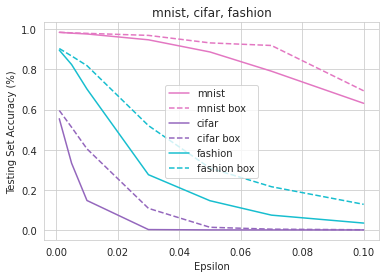

In [ ]:
sns.set_style('whitegrid')

plt.plot(epsilon, saved.arrys['mnist_fgsm'], color='C6')
plt.plot(epsilon, saved.arrys['mnist_fgsm_box'], color='C6', linestyle='--')
plt.plot(epsilon, saved.arrys['cifar_fgsm'], color='C4')
plt.plot(epsilon, saved.arrys['cifar_fgsm_box'], color='C4', linestyle='--')
plt.plot(epsilon, saved.arrys['fashion_fgsm'], color='C9')
plt.plot(epsilon, saved.arrys['fashion_fgsm_box'], color='C9', linestyle='--')
plt.legend(["mnist", "mnist box", "cifar", "cifar box", "fashion", "fashion box"])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.title('mnist, cifar, fashion')
plt.show()

<a name="fgsm"></a>
# FGSM vs RAND+FGSM
The below graph shows the rand+fgsm attack on all three datsets. The attack has an almost identicle effect to vanilla fgsm.
<br/>[Return to Appendix](#appendix)

In [ ]:
load_run_save('fashion_randfgsm','fashion_mnist', black_box=False, attack='rand+fgsm', show=False)
load_run_save('fashion_randfgsm_box','fashion_mnist', black_box=True, attack='rand+fgsm', show=False)
load_run_save('mnist_randfgsm','mnist', black_box=False, attack='rand+fgsm', show=False)
load_run_save('mnist_randfgsm_box','mnist', black_box=True, attack='rand+fgsm', show=False)
load_run_save('cifar_randfgsm','cifar10', black_box=False, attack='rand+fgsm', show=False)
load_run_save('cifar_randfgsm_box','cifar10', black_box=True, attack='rand+fgsm', show=False)

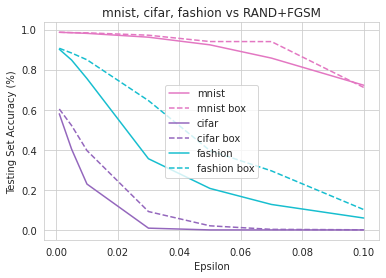

In [17]:
sns.set_style('whitegrid')

plt.plot(epsilon, saved.arrys['mnist_randfgsm'], color='C6')
plt.plot(epsilon, saved.arrys['mnist_randfgsm_box'], color='C6', linestyle='--')
plt.plot(epsilon, saved.arrys['cifar_randfgsm'], color='C4')
plt.plot(epsilon, saved.arrys['cifar_randfgsm_box'], color='C4', linestyle='--')
plt.plot(epsilon, saved.arrys['fashion_randfgsm'], color='C9')
plt.plot(epsilon, saved.arrys['fashion_randfgsm_box'], color='C9', linestyle='--')
plt.legend(["mnist", "mnist box", "cifar", "cifar box", "fashion", "fashion box"])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.title('mnist, cifar, fashion vs RAND+FGSM')
plt.show()

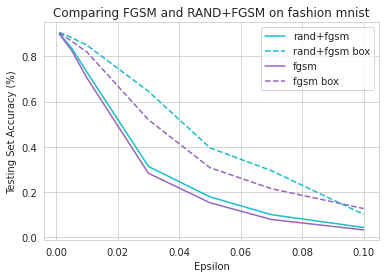

In [42]:
plt.plot(epsilon, saved.arrys['fashion_randfgsm'], color='C9')
plt.plot(epsilon, saved.arrys['fashion_randfgsm_box'], color='C9', linestyle='--')
plt.plot(epsilon, saved.arrys['fashion_fgsm'], color='C4')
plt.plot(epsilon, saved.arrys['fashion_fgsm_box'], color='C4', linestyle='--')
plt.legend(['rand+fgsm', 'rand+fgsm box', 'fgsm', 'fgsm box'])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.title('Comparing FGSM and RAND+FGSM on fashion mnist')
plt.show()

<a name="qs"></a>
# Examining Black Box Query Strength
The above black box attack assumes the adversary has unlimited queries to reverse engineer the original model. In reality this may not be the case. The below graph show the effectivess of black box FGSM Attack when we limit the number of queries.
<br/>[Return to Appendix](#appendix)

In [ ]:
epsilon = [.001, .005, .01, .03, .05, .07, .1]
queryStrengths  = [100, 500, 1000, 3000, 5000, 15000, 30000, None]
saved.fashion_graph.clear()
for qs in queryStrengths:
  print(f"Query Stregnth: {qs}")
  accs = []
  for eps in epsilon:
    print(f"epsilon: {eps}")
    accs.append(load_and_run('fashion_mnist', black_box=True, QS=qs, attack='fgsm', epsilon=eps, show=False))
  saved.fashion_graph.append(accs)
  print()

In [ ]:
epsilon = [.001, .005, .01, .03, .05, .07, .1]
queryStrengths  = [100, 500, 1000, 3000, 5000, 15000, 30000, None]
saved.mnist_graph.clear()
for qs in queryStrengths:
  print(f"Query Stregnth: {qs}")
  accs = []
  for eps in epsilon:
    print(f"epsilon: {eps}")
    accs.append(load_and_run('mnist', black_box=True, QS=qs, attack='fgsm', epsilon=eps, show=False))
  saved.mnist_graph.append(accs)
  print()

In [ ]:
queryStrengths  = [100, 500, 1000, 3000, 5000, 15000, 30000, None]
saved.cifar_graph.clear()
for qs in queryStrengths:
  print(f"Query Stregnth: {qs}")
  accs = []
  for eps in epsilon:
    print(f"epsilon: {eps}")
    accs.append(load_and_run('cifar10', black_box=True, QS=qs, attack='fgsm', epsilon=eps, show=False))
  saved.cifar_graph.append(accs)
  print()

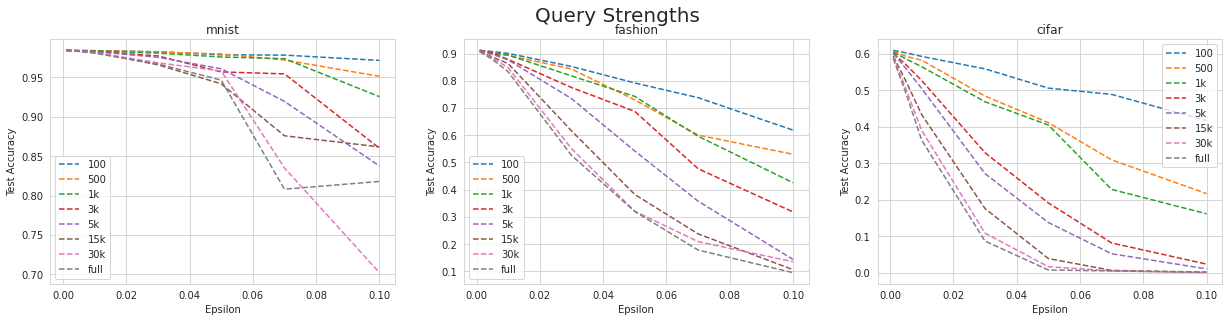

In [ ]:
fig, (plt1, plt2, plt3) = plt.subplots(1, 3, figsize=(21,4.5))
fig.suptitle('Query Strengths', fontsize=20)
for pl, graph in zip([plt1, plt2, plt3], [saved.arrys2d['mnist_qs'], saved.arrys2d['fashion_qs'], saved.arrys2d['cifar_qs']]):
  for strength in graph:
    pl.plot(epsilon, strength, linestyle='--')
  pl.legend(['100', "500", "1k", "3k", "5k","15k","30k", "full"])
  plt.setp(pl, xlabel='Epsilon', ylabel='Test Accuracy')
plt1.title.set_text('mnist')
plt2.title.set_text('fashion')
plt3.title.set_text('cifar')
plt.show()


<a name="adv"></a>
#Adversarial Training Defense

The adversarial training defense involves the following steps:
1. Create adversarial instances on the model
2. retrain a new model on an new dataset containing both the adverarial instances and the original dataset

These two steps can be repeated as a method to further increase robustness.<br>
<br>
From our original experimentation we show that this is a very strong defense assuming the model knows the type of adversarial input will get(strong assumption). However, the defense can be weakened if the adversary creates new adversarial inputs *after* the adversairal training has been done. <br/>


<br/>[Return to Appendix](#appendix)

### FGSM vs Adversarial Training
The graph below shows much higher accuracy when applying adversarial training than without. 

In [ ]:
load_run_save('training_vs_fgsm','fashion_mnist', attack='fgsm', defense='adv-training')
load_run_save('training_vs_fgsm_box','fashion_mnist', black_box=True, attack='fgsm', defense='adv-training')

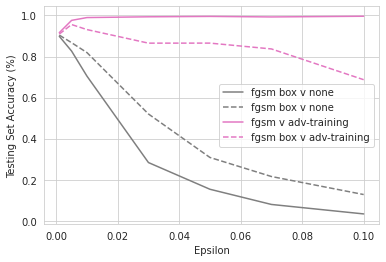

In [45]:
plt.plot(epsilon, saved.arrys['fashion_fgsm'], color='C7')
plt.plot(epsilon, saved.arrys['fashion_fgsm_box'], color='C7', linestyle='--')
plt.plot(epsilon, saved.arrys['training_vs_fgsm'], color='C6')
plt.plot(epsilon, saved.arrys['training_vs_fgsm_box'], color='C6', linestyle='--')
plt.legend(["fgsm box v none", 'fgsm box v none',"fgsm v adv-training", 'fgsm box v adv-training'])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.show()

### Adversary Epsilon Unknown to Model
The next trial looks at the whether the epsilon value used my the attack is known to the defense. The graph below shows this not critical information for the defense as the defense performs equally well with or without knowledge of the epsilon value.

In [ ]:
load_run_save('trainingR_vs_fgsm','fashion_mnist', attack='fgsm', defense='adv-trainingR', v=2)
load_run_save('trainingR_vs_fgsm_box','fashion_mnist', black_box=True, attack='fgsm', defense='adv-trainingR')

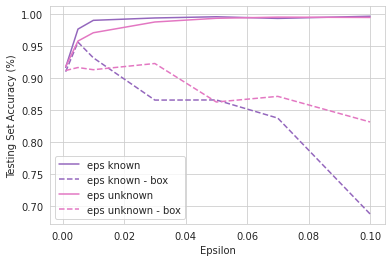

In [43]:
plt.plot(epsilon, saved.arrys['training_vs_fgsm'], linestyle='-', color='C4')
plt.plot(epsilon, saved.arrys['training_vs_fgsm_box'], linestyle='--', color='C4')
plt.plot(epsilon, saved.arrys['trainingR_vs_fgsm'], linestyle='-', color='C6')
plt.plot(epsilon, saved.arrys['trainingR_vs_fgsm_box'], linestyle='--', color='C6')
plt.legend(["eps known", "eps known - box", "eps unknown", "eps unknown - box"])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.show()

### 2 Layer FGSM Attack
In the above plots we see that adversarial training was very effective against fgsm images. However, this assumed that the adversary created adversarial images before the model re-trained on its own adversarial images. If the adversary has continuous access to the weights he can recreate his input after the adversarial-training defense is applied.<br>
<br>
The below graph show that with this attack the defense becomes useless.

In [ ]:
load_run_save('training_vs_fgsm2','fashion_mnist', black_box=False, attack='fgsm2', defense='adv-training')
load_run_save('training_vs_fgsm2_box','fashion_mnist', black_box=True, attack='fgsm2', defense='adv-training')

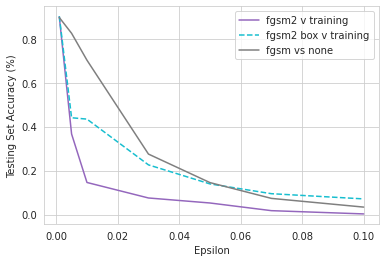

In [ ]:
plt.plot(epsilon, saved.arrys['training_vs_fgsm2'], color='C4')
plt.plot(epsilon, saved.arrys['training_vs_fgsm2_box'], linestyle='--', color='C9')
plt.plot(epsilon, saved.arrys['fashion_fgsm'], color='C7')
plt.legend(["fgsm2 v training", "fgsm2 box v training", 'fgsm vs none'])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.show()

### Iterative Adversarial Training
By iteratively creating adversarial examples and retraining, the model becomes more robust. Our trials showed that the more retraining cycles the more robust the model is which is represented in the graph below. Increasing the number of training iterations does quickly increase computation time.

In [ ]:
load_run_save('training5_vs_fgsm2','fashion_mnist', black_box=False, attack='fgsm2', defense='adv-training5')
load_run_save('training5_vs_fgsm2_box','fashion_mnist', black_box=True, attack='fgsm2', defense='adv-training5')

In [ ]:
load_run_save('training20_vs_fgsm2','fashion_mnist', black_box=False, attack='fgsm2', defense='adv-training-iter', iters=20)
load_run_save('training20_vs_fgsm2_box','fashion_mnist', black_box=True, attack='fgsm2', defense='adv-training-iter', iters=20)

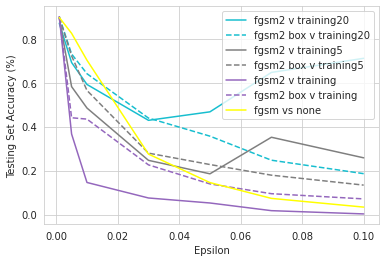

In [ ]:
plt.plot(epsilon, saved.arrys['training20_vs_fgsm2'], color='C9')
plt.plot(epsilon, saved.arrys['training20_vs_fgsm2_box'], color='C9', linestyle='--')
plt.plot(epsilon, saved.arrys['training5_vs_fgsm2'], color='C7')
plt.plot(epsilon, saved.arrys['training5_vs_fgsm2_box'], color='C7', linestyle='--')
plt.plot(epsilon, saved.arrys['training_vs_fgsm2'], color='C4')
plt.plot(epsilon, saved.arrys['training_vs_fgsm2_box'], linestyle='--', color='C4')
plt.plot(epsilon, saved.arrys['fashion_fgsm'], color='yellow')
plt.legend(["fgsm2 v training20","fgsm2 box v training20","fgsm2 v training5","fgsm2 box v training5","fgsm2 v training", "fgsm2 box v training", 'fgsm vs none'])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.show()

In [ ]:
load_run_save('trainingf14_vs_fgsm2','fashion_mnist', black_box=False, attack='fgsm2', defense='adv-trainingf-iter', iters=14)
load_run_save('trainingf14_vs_fgsm2_box','fashion_mnist', black_box=True, attack='fgsm2', defense='adv-trainingf-iter', iters=14)

<a name="magnet"></a>
# MagNet
Meng and Chen 2017 [[2]](https://arxiv.org/pdf/1705.09064.pdf)
MagNet is a proposed defensive framework that utilizes autoencoders to detect adversial inputs. They implement two styles of autoencoders, detectors and reformers. 

The detectors are trained on the training images, and learn to halve the input space, and attempt to restore it back to the original image, with minimal loss. In doing this, they are learning what the normal manifold looks like. Thus, when an adversial input is passed into the detector, the reconstruction error will be high, meaning it is far from the normal manifold, and it is marked as adversial.

The reformers are trained the same way, learning the normal manifold and minimzing reconstruction error. However, they are used to transform adversial inputs to bring them closer to the target manifold. In the case of adversial inputs that have slipped through the detector, the reformer will attempt to shift that image closer to the training data generation process as a way to improve classification results.

For our experiment below, we implemented one reformer and two detectors, however with different datasets, different types of architectures may be more effective. 
<br/>[Return to Appendix](#appendix)

In [ ]:
load_run_save('mag_vs_fgsm','fashion_mnist', black_box=False, defense='magnet')
load_run_save('mag_vs_fgsm_box','fashion_mnist', black_box=True, defense='magnet')

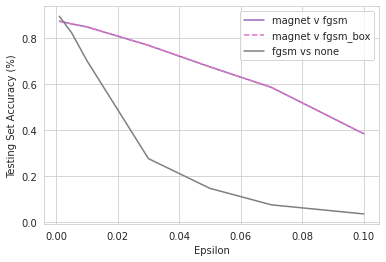

In [15]:
plt.plot(epsilon, saved.arrys['mag_vs_fgsm'], color='C4')
plt.plot(epsilon, saved.arrys['mag_vs_fgsm_box'], linestyle='--', color='C6')
plt.plot(epsilon, saved.arrys['fashion_fgsm'], color='C7')
plt.legend(["magnet v fgsm", "magnet v fgsm_box", 'fgsm vs none'])
plt.xlabel("Epsilon")
plt.ylabel("Testing Set Accuracy (%)")
plt.show()

<a name="dgan"></a>
# DefenseGAN

Proposed by Samangouei et al. 2018 [[1]](https://arxiv.org/pdf/1805.06605.pdf)<br>
The Defense-GAN defense consists of the following steps:
1. Train Wasserstein GAN (introtuced in [[6]](https://arxiv.org/pdf/1701.07875.pdf))
2. Use generative power of GAN to generate a similar input
  - Use gradients to change random array input to the Generator
  
<br/>[Return to Appendix](#appendix)

In [ ]:
def make_load_gen_disc(dir):
  discriminator = make_discriminator_model()
  generator = make_generator_model()
  discriminator.load_weights(dir+'/disc')
  generator.load_weights(dir+'/gen')

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

def make_discriminator_model():
    clipper = ClipConstraint(.01)
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', 
                            input_shape=[28, 28, 1], kernel_constraint=clipper))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', kernel_constraint=clipper))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

class ClipConstraint(Constraint):
	# set clip value when initialized
	def __init__(self, clip_value):
		self.clip_value = clip_value
 
	# clip model weights to hypercube
	def __call__(self, weights):
		return backend.clip(weights, -self.clip_value, self.clip_value)
 
	# get the config
	def get_config(self):
		return {'clip_value': self.clip_value}
    

In [ ]:


    
def gan_normalize_img(image, label):
  return (tf.cast(image, tf.float32) - 127.5)/127.5#, label

def gan_normalize_img2(image, label):
  return (tf.cast(image, tf.float32) - 127.5)/127.5, label





def disc_loss(real_output, fake_output):
  real_loss = tf.math.reduce_mean(real_output)
  fake_loss = tf.math.reduce_mean(fake_output)
  loss = fake_loss-real_loss
  return loss

def generator_loss(fake_output):
  loss = -1. * tf.math.reduce_mean(fake_output)
  return loss

# @tf.function causes the function to be compiled
@tf.function
def train_step(images):
  # global batch_size
  disc_steps=4
  noise = tf.random.normal([batch_size, noise_dim])
  dl_tot = 0
  for _ in range(disc_steps):
    gend_imgs = generator(noise, training=True)

    with tf.GradientTape() as disc_tape:
      real_output = discriminator(images, training=True)
      fake_output = discriminator(gend_imgs, training=True)
      dl = disc_loss(real_output, fake_output)
    dl_tot += dl
    disc_grads = disc_tape.gradient(dl, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

  with tf.GradientTape() as gen_tape:
    gend_imgs = generator(noise, training=True)
    fake_output = discriminator(gend_imgs, training=True)
    gl = generator_loss(fake_output)

  gen_grads = gen_tape.gradient(gl, generator.trainable_variables)
  generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))
  
  return gl,dl_tot/disc_steps

gl_all = []
dl_all = []
def train_gan(dataset, epochs):
  for epoch in range(epochs):
    gl_tot = 0
    dl_tot = 0
    count = 0
    for batch in dataset:
      (gl, dl) = train_step(batch)
      gl_tot += gl
      dl_tot += dl
      gl_all.append(gl)
      dl_all.append(dl)
      count += 1
    
    display.clear_output(wait=True)
    print(f'epoch {epoch+1}')
    print(f'Gen loss: {gl/count} Disc loss: {dl/count}')
    generate_and_save_images(generator,epoch + 1,seed)
    generator.save_weights(DATASET+'_gan/gen')
    discriminator.save_weights(DATASET+'_gan/disc')

def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(8,8))

  for i in range(predictions.shape[0]):
      plt.subplot(5, 5, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

DATASET = 'mnist'
(ds_train, ds_test), ds_info = tfds.load(
    DATASET,
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


batch_size=64

ds_train = ds_train.map(gan_normalize_img)
ds_train = ds_train.batch(batch_size)


generator = make_generator_model()
discriminator = make_discriminator_model()

# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.RMSprop(5e-6)
discriminator_optimizer = tf.keras.optimizers.RMSprop(5e-5)

epochs = 50
noise_dim = 100
num_examples_to_generate = 25


seed = tf.random.normal([num_examples_to_generate, noise_dim])

train_gan(ds_train, 25)

In [ ]:
def defenseGAN_reconstruct(ds_test):
  labels = np.concatenate([y for x, y in ds_test], axis=0)
  
  rec_imgs = 0
  cnt = 0
  for batch, _ in ds_test:
    cnt += 1
    if cnt % 2 == 0:
      print(f'Batch {cnt}')
    start = True
    for i in batch:
      recd_img = reconstruct_single(i)
      if start:
        start = False
        show_2img(i, recd_img)
      rec_imgs = np.append(rec_imgs, recd_img)


  return new_test

def reconstruct_single(img):
  R = 30
  Zs = 10
  Z = []
  aida = 1e-4
  for _ in range(Zs):
    # z = np.random.normal(size=(28,28,1))
    z = tf.random.normal([1,100])
    for i in range(R):
      with tf.GradientTape() as gen_tape:
        gen_tape.watch(z)
        recond = generator(z, training=False)
        diff = tf.math.abs(recond-img)

      grads = gen_tape.gradient(diff, z)
      z = grads*aida + z

    Z.append(z)

  Z_diffs = [tf.math.reduce_euclidean_norm(z).numpy() for z in Z]
  return tf.squeeze(generator(Z[np.argmin(Z_diffs)], training=False), axis=[0])


    

In [ ]:
load_and_run('mnist', attack='fgsm', defense='DefenseGAN', epsilon=None)

#PersistentResults
module to save results data to file


In [5]:
# add new key and reintialize PersistentResults to add new array 
data_lines = [
              # No Defense
              'mnist_fgsm',
              'mnist_fgsm_box',
              'cifar_fgsm',
              'cifar_fgsm_box',
              'fashion_fgsm',
              'fashion_fgsm_box',
              'mnist_randfgsm',
              'mnist_randfgsm_box',
              'cifar_randfgsm',
              'cifar_randfgsm_box',
              'fashion_randfgsm',
              'fashion_randfgsm_box',

              ### Fashion Dataset by Default###
              # fgsm vs adversarial training
              'training_vs_fgsm',
              'training_vs_fgsm_box',
              'trainingR_vs_fgsm',
              'trainingR_vs_fgsm_box',

              # fgsm 2 vs adversarial training
              'training_vs_fgsm2',
              'training_vs_fgsm2_box',
              'training5_vs_fgsm2',
              'training5_vs_fgsm2_box',
              'training20_vs_fgsm2',
              'training20_vs_fgsm2_box',
              'trainingf14_vs_fgsm2',
              'trainingf14_vs_fgsm2_box',

              # fgsm vs DefenseGAN
              'DGAN_vs_fgsm',

              # fgsm vs MagNet
              'mag_vs_fgsm',
              'mag_vs_fgsm_box',

]
data_lines2d = [
                # Query Strength
                'fashion_qs',
                'mnist_qs',
                'cifar_qs',

                # Adversarial Training Iterations
                'fashion_it',
                'fashion_box_it',
]

### Download and initialize 'PersistentResults'
all new data will be lost

In [6]:
epsilon = [.001,.005, .01, .03, .05, .07, .1]
results_link = 'https://raw.githubusercontent.com/WesRobbins/AdversarialML/main/results.csv'
arry_link = 'https://raw.githubusercontent.com/WesRobbins/AdversarialML/main/arrys.py'
urllib.request.urlretrieve(results_link, 'results.csv')
urllib.request.urlretrieve(arry_link, 'arry.py')
sns.set_style('whitegrid')
import arry
reload(arry)
saved = arry.PersistentResults(data_lines, data_lines2d)

### Just Initialize 'PersistentResults'
all new data will be lost unless written to 'results'



In [22]:
import arry
epsilon = [.001,.005, .01, .03, .05, .07, .1]
reload(arry)
saved = arry.PersistentResults(data_lines, data_lines2d)

### Load data from 'results' file

In [19]:
saved.read_results()

### Write Results to 'results' file

In [ ]:
saved.diff()

The folling keys would be updated in case of a write:
------------------------------------------------------
Key: training5_vs_fgsm2 - In memory: Filled In File: Filled
Key: training5_vs_fgsm2_box - In memory: Filled In File: Filled


In [21]:
saved.write_all()

mnist_fgsm was written
mnist_fgsm_box was written
cifar_fgsm was written
cifar_fgsm_box was written
fashion_fgsm was written
fashion_fgsm_box was written
mnist_randfgsm was written
mnist_randfgsm_box was written
cifar_randfgsm was written
cifar_randfgsm_box was written
fashion_randfgsm was written
fashion_randfgsm_box was written
training_vs_fgsm was written
training_vs_fgsm_box was written
trainingR_vs_fgsm was written
trainingR_vs_fgsm_box was written
training_vs_fgsm2 was written
training_vs_fgsm2_box was written
training5_vs_fgsm2 was written
training5_vs_fgsm2_box was written
training20_vs_fgsm2 was written
training20_vs_fgsm2_box was written
trainingf14_vs_fgsm2 was written
trainingf14_vs_fgsm2_box was written
ERR: DGAN_vs_fgsm is wrong size
mag_vs_fgsm was written
mag_vs_fgsm_box was written
fashion_qs_QS100 was written
fashion_qs_QS500 was written
fashion_qs_QS1000 was written
fashion_qs_QS3000 was written
fashion_qs_QS5000 was written
fashion_qs_QS15000 was written
fashion_qs_

### Show arrays in Memory

In [20]:
saved.show_arrys()

mnist_fgsm: Correct
mnist_fgsm_box: Correct
cifar_fgsm: Correct
cifar_fgsm_box: Correct
fashion_fgsm: Correct
fashion_fgsm_box: Correct
mnist_randfgsm: Correct
mnist_randfgsm_box: Correct
cifar_randfgsm: Correct
cifar_randfgsm_box: Correct
fashion_randfgsm: Correct
fashion_randfgsm_box: Correct
training_vs_fgsm: Correct
training_vs_fgsm_box: Correct
trainingR_vs_fgsm: Correct
trainingR_vs_fgsm_box: Correct
training_vs_fgsm2: Correct
training_vs_fgsm2_box: Correct
training5_vs_fgsm2: Correct
training5_vs_fgsm2_box: Correct
training20_vs_fgsm2: Correct
training20_vs_fgsm2_box: Correct
trainingf14_vs_fgsm2: Correct
trainingf14_vs_fgsm2_box: Correct
DGAN_vs_fgsm: Empty
mag_vs_fgsm: Correct
mag_vs_fgsm_box: Correct
fashion_qs: Correct
mnist_qs: Correct
cifar_qs: Correct
fashion_it: Empty
fashion_box_it: Empty

Correct: 29
Empty: 3
Incorrect amount: 0


In [ ]:
def zip_and_dwnld(dirs):
  for i in dirs:
    new_zip = '/content/'+i+'.zip'
    to_zip = '/content/'+i
    !zip -r $new_zip $to_zip 
    files.download(new_zip)

def unzip(zips):
  for i in zips:
    !unzip $i 
    

In [ ]:
 !zip -r ./fashion_gan.zip ./fashion_gan

In [ ]:
zip_and_dwnld(['mnist_gan'])

  adding: content/mnist_gan/ (stored 0%)
  adding: content/mnist_gan/gen.data-00000-of-00001 (deflated 8%)
  adding: content/mnist_gan/checkpoint (deflated 35%)
  adding: content/mnist_gan/disc.data-00000-of-00001 (deflated 13%)
  adding: content/mnist_gan/disc.index (deflated 46%)
  adding: content/mnist_gan/gen.index (deflated 58%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
unzip(['mnist_gan'])

Archive:  mnist_gan.zip
replace fashion_gan/gen.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fashion_gan/gen.data-00000-of-00001  
  inflating: fashion_gan/checkpoint  
  inflating: fashion_gan/disc.data-00000-of-00001  
  inflating: fashion_gan/disc.index  
  inflating: fashion_gan/gen.index   


In [ ]:
make_load_gen_disc('mnist_gan')
print(generator)
print(discriminator)